# Resources for (Python) finance
* https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

Fama-French:
* http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html


# Data Access
* http://quant.caltech.edu/historical-stock-data.html
* https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
* http://eoddata.com/products/historicaldata.aspx
* https://www.quantshare.com/sa-43-10-ways-to-download-historical-stock-quotes-data-for-free
* https://quantquote.com/historical-stock-data

Listing of APIs
* https://www.programmableweb.com/news/96-stocks-apis-bloomberg-nasdaq-and-etrade/2013/05/22

Marketplaces:
* https://www.quandl.com/
* https://intrinio.com/marketplace/data
* http://www.xignite.com/ - http://www.xignite.com/Products/


In [26]:
# Prerequisites:
#  conda install pandas
#  conda install pandas-datareader
#  conda install matplotlib

import pandas as pd
import pandas_datareader.data as web
import datetime 

In [27]:
# From https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float
    : columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a
    : single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns
    : of data that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())),
                                  plotdat["Open"].tolist(),
                                  plotdat["High"].tolist(),
                                  plotdat["Low"].tolist(),
                                  plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()

In [151]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

start = datetime.datetime(1800,1,1)
end = datetime.date.today()

apple_test = web.DataReader("AAPL", "yahoo", start, end)

Populating the interactive namespace from numpy and matplotlib


In [152]:
apple_test.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.750000,28.875000,28.750,28.750,117258400,0.425000
1980-12-15,27.375001,27.375001,27.250,27.250,43971200,0.402826
1980-12-16,25.375000,25.375000,25.250,25.250,26432000,0.373261
1980-12-17,25.875000,25.999999,25.875,25.875,21610400,0.382500
1980-12-18,26.625000,26.750000,26.625,26.625,18362400,0.393587


In [153]:
apple_test.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-04-18,141.410004,142.039993,141.110001,141.199997,14660800,141.199997
2017-04-19,141.880005,142.000000,140.449997,140.679993,17271300,140.679993
2017-04-20,141.220001,142.919998,141.160004,142.440002,23251100,142.440002
2017-04-21,142.440002,142.679993,141.850006,142.270004,17245200,142.270004
2017-04-24,143.500000,143.949997,143.179993,143.639999,17099200,143.639999


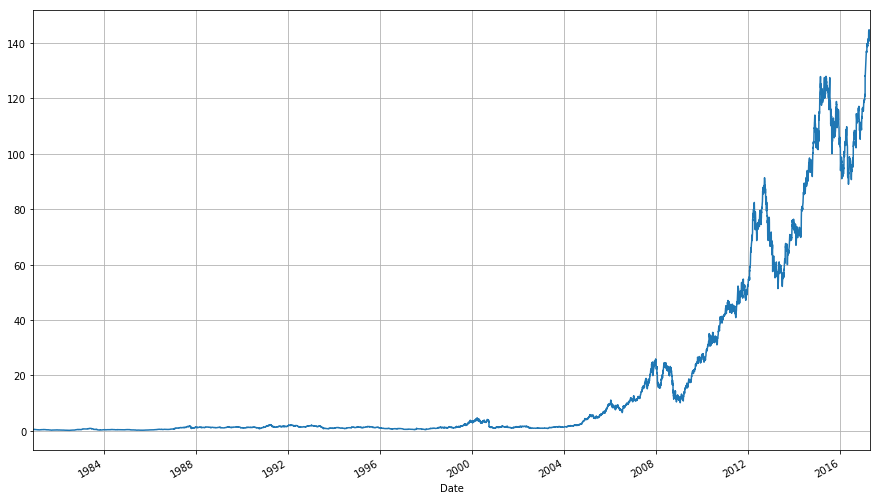

In [154]:
apple_test["Adj Close"].plot(grid = True) # Plot the adjusted closing price of AAPL

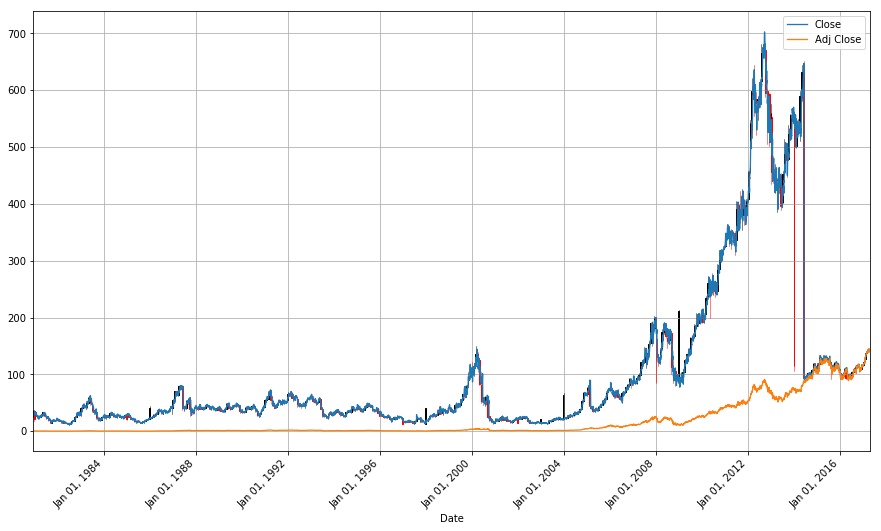

In [155]:
pandas_candlestick_ohlc(apple_test, stick="month", otherseries = ["Close", "Adj Close"])

In [66]:
start = datetime.datetime(2015,1,1)
# end = datetime.datetime(2016,1,1)  # evidently non-inclusive end (right-open interval)
end = datetime.date.today()

apple = web.DataReader("AAPL", "yahoo", start, end)

In [67]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,111.389999,111.440002,107.349998,109.330002,53204600,104.704758
2015-01-05,108.290001,108.650002,105.410004,106.250000,64285500,101.755057
2015-01-06,106.540001,107.430000,104.629997,106.260002,65797100,101.764636
2015-01-07,107.199997,108.199997,106.699997,107.750000,40105900,103.191599
2015-01-08,109.230003,112.150002,108.699997,111.889999,59364500,107.156454


In [68]:
apple.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2017-04-17,141.479996,141.880005,140.869995,141.830002,16424000,141.830002
2017-04-18,141.410004,142.039993,141.110001,141.199997,14660800,141.199997
2017-04-19,141.880005,142.000000,140.449997,140.679993,17271300,140.679993
2017-04-20,141.220001,142.919998,141.160004,142.440002,23251100,142.440002
2017-04-21,142.440002,142.679993,141.850006,142.270004,17245200,142.270004


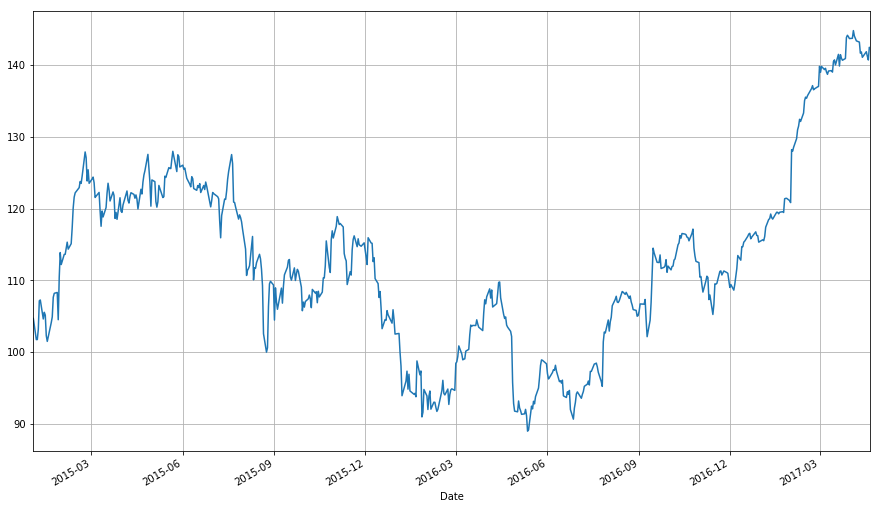

In [69]:
apple["Adj Close"].plot(grid = True)

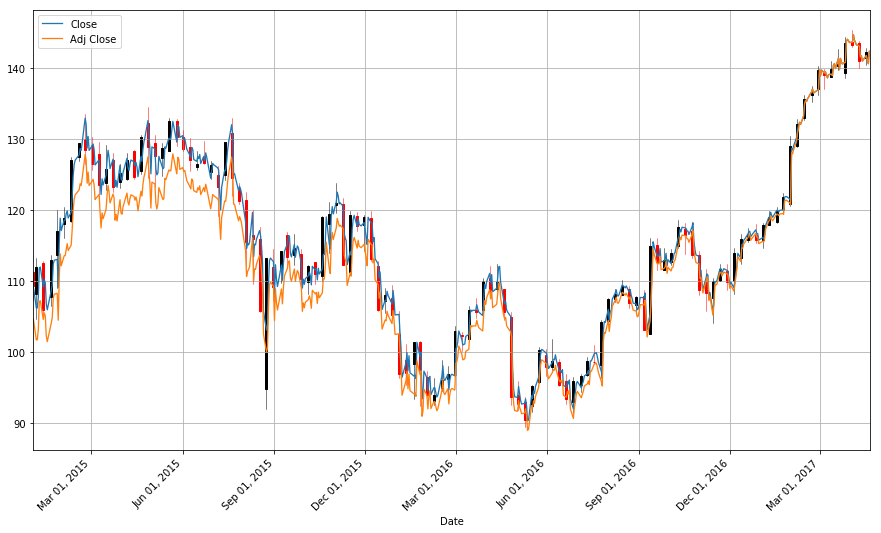

In [70]:
pandas_candlestick_ohlc(apple, stick="week", otherseries = ["Close", "Adj Close"])

In [149]:
start = datetime.datetime(1800,1,1)
end = datetime.date.today()

apple_all = web.DataReader("AAPL", "yahoo", start, end)

In [150]:
apple_all.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.750000,28.875000,28.750,28.750,117258400,0.425000
1980-12-15,27.375001,27.375001,27.250,27.250,43971200,0.402826
1980-12-16,25.375000,25.375000,25.250,25.250,26432000,0.373261
1980-12-17,25.875000,25.999999,25.875,25.875,21610400,0.382500
1980-12-18,26.625000,26.750000,26.625,26.625,18362400,0.393587
